In [1]:
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
"""available_buttons = 
	{  
		MOVE_FORWARD
		MOVE_BACKWARD
		TURN_LEFT_RIGHT_DELTA
		MOVE_FORWARD_BACKWARD_DELTA
		MOVE_LEFT_RIGHT_DELTA
	}"""


possible_actions = np.zeros((8,6),dtype=int).tolist()
possible_actions[0] = [1,0,0,0,0]
possible_actions[1] = [0,1,0,0,0]
possible_actions[2] = [0,0,-45,0,0]
possible_actions[3] = [0,0,45,0,0]
possible_actions[4] = [0,0,0,50,0]
possible_actions[5] = [0,0,0,-50,0]
possible_actions[6] = [0,0,0,0,30]
possible_actions[7] = [0,0,0,0,-30]
possible_actions

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, -45, 0, 0],
 [0, 0, 45, 0, 0],
 [0, 0, 0, 50, 0],
 [0, 0, 0, -50, 0],
 [0, 0, 0, 0, 30],
 [0, 0, 0, 0, -30]]

Found
(240, 320)
[1105.06420898 2801.31503296    0.          281.51367194]
[1105.06420898 2801.31503296    0.          191.51367192]


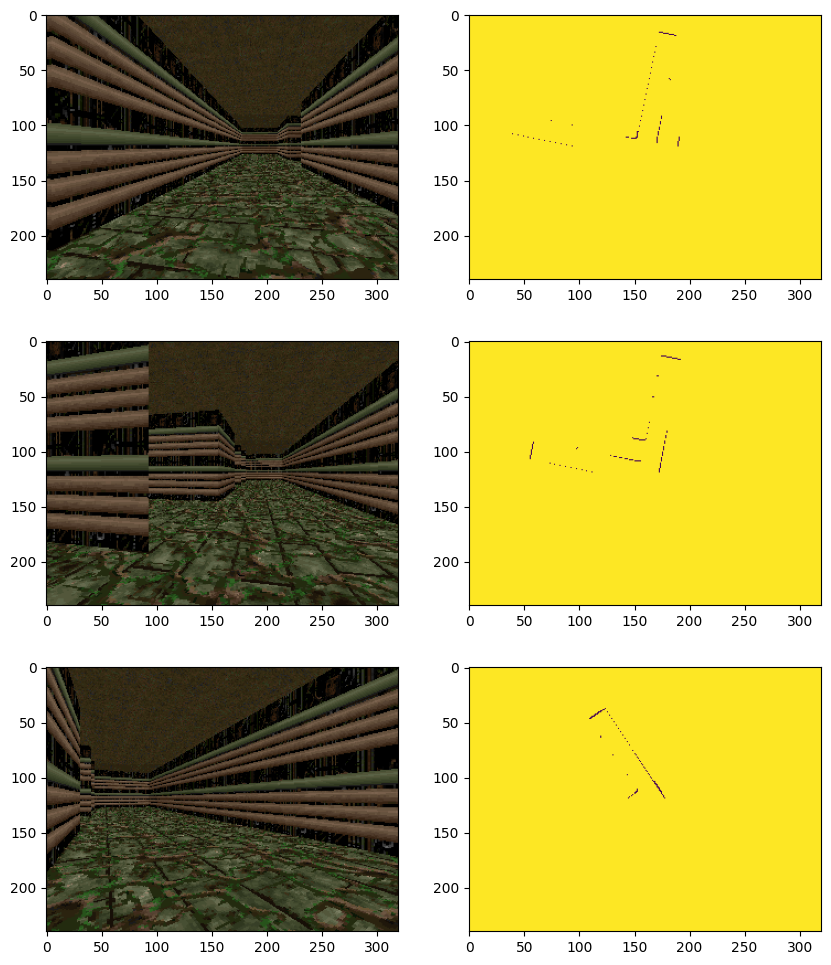

In [24]:
import sys
sys.path.append('../')

from matplotlib import pyplot as plt
from DataGeneration.local_map import look_around


game = vzd.DoomGame()
game.load_config('../data/resources/datagen.cfg')
game.set_doom_scenario_path('../data/maps_1key_noaug/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
#game.set_seed(1)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()
game.get_state()

st1 = game.get_state()

cam1 = st1.screen_buffer
#print(len(st1.objects))

for obj in st1.objects:
    if obj.name == 'RedCard':
        if obj.id == 0:
            print('Found')

mp1 = look_around(st1)
print(mp1.shape)

var1 = st1.game_variables

print(var1)

game.make_action([0,0, 90, 0, 0], 1)

st2 = game.get_state()

var2 = st2.game_variables

print(var2)

cam2 = st2.screen_buffer

mp2 = look_around(st2)

game.make_action([0,0, 0, 110, 0], 19) # Walking action takes more frames to complete (19 in this case). This is because of hard cap on speed.
game.make_action([0,0, 45, 0, 0], 1)

st3 = game.get_state()

cam3 = st3.screen_buffer

mp3 = look_around(st3)

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axs[0, 0].imshow(cam1)
axs[0, 1].imshow(mp1)
axs[1, 0].imshow(cam2)
axs[1, 1].imshow(mp2)
axs[2, 0].imshow(cam3)
axs[2, 1].imshow(mp3)

plt.show()

game.close()




